### **Read The Unlabelled Data:**

In [1]:
import pandas as pd
import numpy as np

In [2]:
prof_data = pd.read_csv("data.csv.zip")

In [3]:
id = prof_data["ID"]

In [4]:
prof_data.drop("ID", axis = 1, inplace = True)

### **Read The Labelled Data:**

In [44]:
mnist_data = pd.read_csv("train.csv.zip")

In [45]:
y_label = mnist_data["label"][:999]

### **Boolean Data & Its Inverse:**

In [8]:
boolean_data = prof_data.astype(bool)

In [9]:
inverse_boolean_data = ~boolean_data

### **Feature Reduction - UMAP:**

In [ ]:
!pip install umap-learn

In [16]:
from umap import UMAP

In [ ]:
umap = UMAP(n_neighbors = 10, min_dist = 0.1, n_components = 2, random_state = 59)
inverse_bool_umap = umap.fit_transform(inverse_boolean_data)

### **Clustering Model:**

In [14]:
from sklearn.cluster import Birch

In [61]:
# Best Model:
birch_model_1 = Birch(threshold = 0.1, branching_factor = 10, n_clusters = 10)
y_birch_bool_1 = birch_model_1.fit_predict(inverse_bool_umap)

In [62]:
# Second Best Model:
birch_model_2 = Birch(threshold = 0.8, branching_factor = 80, n_clusters = 10)
y_birch_bool_2 = birch_model_2.fit_predict(inverse_bool_umap)

### **Graphing:**

In [42]:
import matplotlib.pyplot as plt

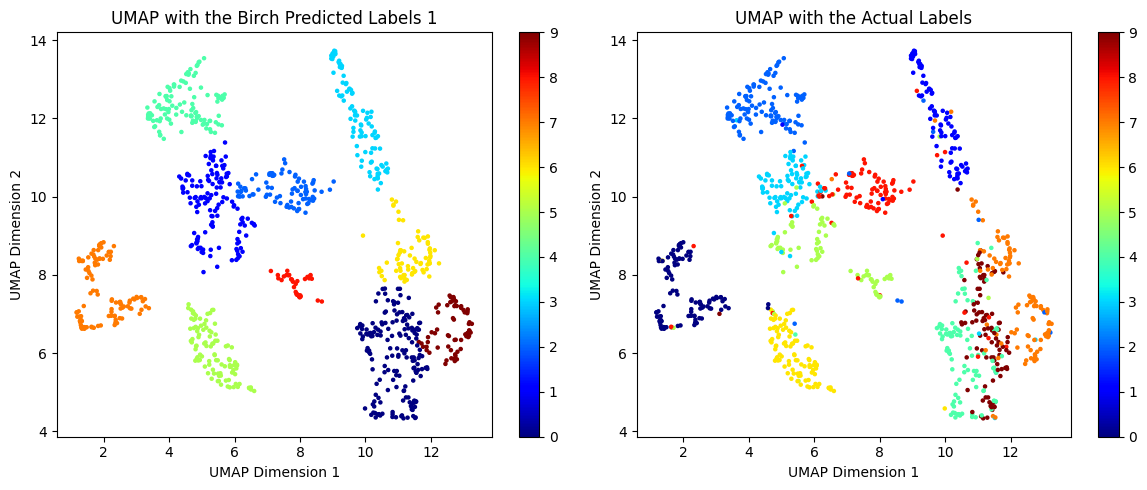

In [63]:
import matplotlib.pyplot as plt

# figure with two subplots:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# labels predicted by birch scatter plot:
scatter1 = ax1.scatter(inverse_bool_umap[:, 0], inverse_bool_umap[:, 1], c = y_birch_bool_1, cmap = 'jet', s = 5)
ax1.set_title('UMAP with the Birch Predicted Labels 1')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
fig.colorbar(scatter1, ax = ax1)

# actual labels scatter plot:
scatter2 = ax2.scatter(inverse_bool_umap[:, 0], inverse_bool_umap[:, 1], c = y_label, cmap = 'jet', s = 5)
ax2.set_title('UMAP with the Actual Labels')
ax2.set_xlabel('UMAP Dimension 1')
ax2.set_ylabel('UMAP Dimension 2')
fig.colorbar(scatter2, ax = ax2)

# showing the subplots:
plt.tight_layout()
plt.show()


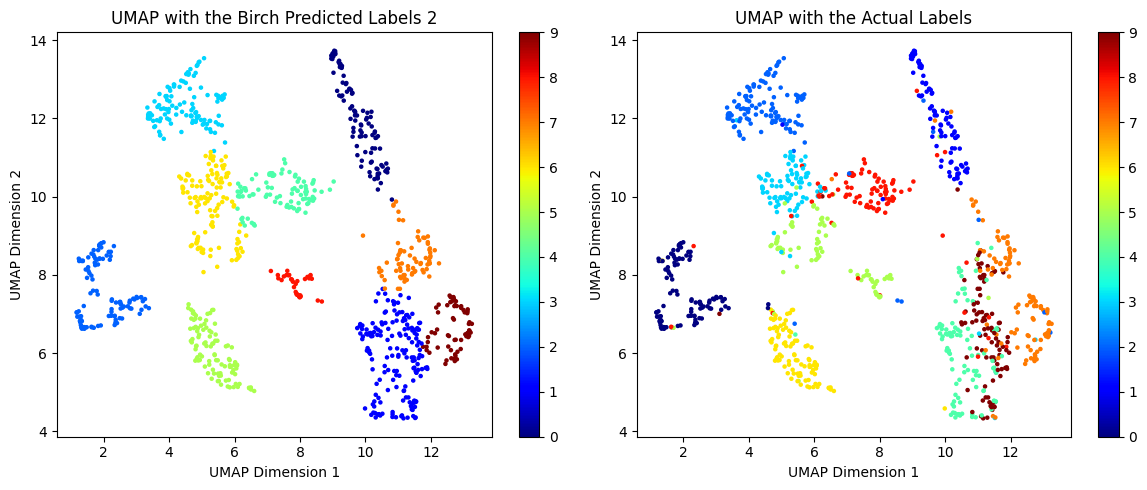

In [64]:
import matplotlib.pyplot as plt

# figure with two subplots:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# labels predicted by birch scatter plot:
scatter1 = ax1.scatter(inverse_bool_umap[:, 0], inverse_bool_umap[:, 1], c = y_birch_bool_2, cmap = 'jet', s = 5)
ax1.set_title('UMAP with the Birch Predicted Labels 2')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
fig.colorbar(scatter1, ax = ax1)

# actual labels scatter plot:
scatter2 = ax2.scatter(inverse_bool_umap[:, 0], inverse_bool_umap[:, 1], c = y_label, cmap = 'jet', s = 5)
ax2.set_title('UMAP with the Actual Labels')
ax2.set_xlabel('UMAP Dimension 1')
ax2.set_ylabel('UMAP Dimension 2')
fig.colorbar(scatter2, ax = ax2)

# showing the subplots:
plt.tight_layout()
plt.show()


### **Save Results File:**

In [ ]:
file_dict = {"ID" : id, "label" : y_birch_bool_1}
file_df = pd.DataFrame(file_dict)
file_df.to_csv('sample_submission_umap_birch_1.csv', index = False)

In [ ]:
file_dict = {"ID" : id, "label" : y_birch_bool_2}
file_df = pd.DataFrame(file_dict)
file_df.to_csv('sample_submission_umap_birch_2.csv', index = False)